In [1]:
import pandas as pd
import numpy as np
import helper
import joblib
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use('dark_background')

In [2]:
#Data Loading
folder_path = "datasets"
data_file = "train.csv"

#Binary datasets
multimodel_train_set = helper.data_loader(folder_path, data_file, 'train', 'multiclass')
multimodel_test_set = helper.data_loader(folder_path, data_file, 'test', 'multiclass')

x_train, y_train = multimodel_train_set
x_test, y_test = multimodel_test_set
x_prepared = helper.data_pipeline.fit_transform(x_train)

In [3]:
#Model Loading
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

random_forest = joblib.load('multin_random_forrest.pkl')
knn = joblib.load('multin_knn.pkl')
sgd = joblib.load('multin_sgd.pkl')

In [4]:
#Predictions
from sklearn.model_selection import cross_val_predict, cross_val_score

y_pred_random = cross_val_predict(random_forest, x_prepared, y_train, cv = 5)
y_pred_knn = cross_val_predict(knn, x_prepared, y_train, cv = 5)
y_pred_sgd = cross_val_predict(random_forest, x_prepared, y_train, cv = 5)

In [5]:
#Probabilities

y_prob_random = random_forest.predict_proba(x_prepared)[:, 0]
y_prob_knn = knn.predict_proba(x_prepared)[:, 0]
y_prob_sgd = cross_val_predict(sgd, x_prepared, y_train, cv = 5, method = 'decision_function')


<h4>Random Forest Eval</h4>

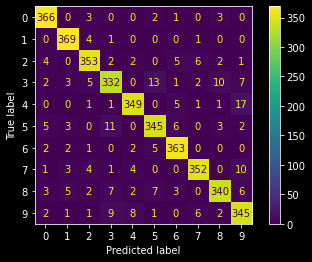

In [6]:
random_eval = helper.classificationEval(y_train, y_pred_random, y_prob_random)
random_eval.confusion_matrix()

<h4>KNN Eval</h4>

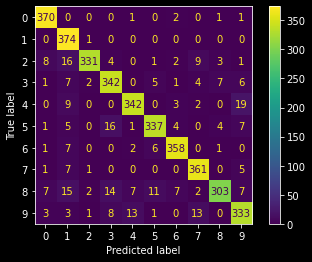

In [7]:
knn_eval = helper.classificationEval(y_train, y_pred_knn, y_prob_knn)
knn_eval.confusion_matrix()

<h4> Random Forest Predictions and simulations </h4>

In [100]:
#random forest predicted matrix
x_test_prepared = helper.data_pipeline.fit_transform(x_test)
predicteds = cross_val_predict(random_forest, x_test_prepared, y_test, cv = 15)

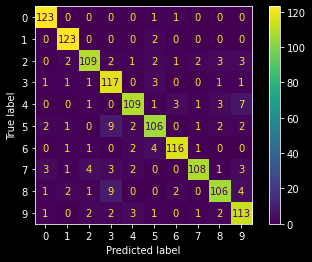

In [101]:
predicted_eval = helper.classificationEval(y_test, predicteds, None)
predicted_eval.confusion_matrix()

In [124]:
#Testing the Random Forest Model
import random
some_digit = random.randint(0, len(x_test))
predicted_numbers = random_forest.predict(x_test_prepared)
predicted_number = real_numbers[some_digit]

7

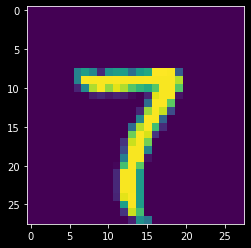

In [125]:
real_number = x_test.iloc[some_digit,:]
plt.imshow(np.array(real_number).reshape(28, 28))
predicted_number